C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


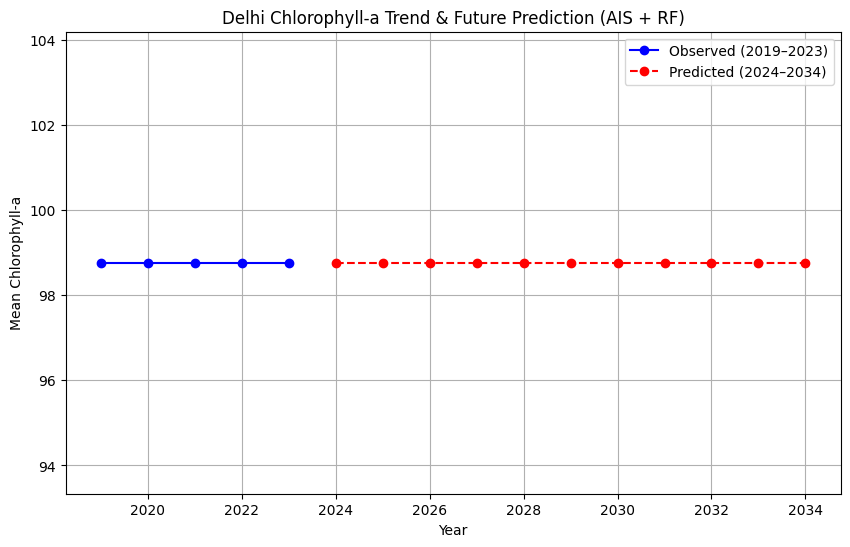

✅ Prediction saved to Delhi_Chlorophyll_a_2019_2034.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import differential_evolution

# 📂 Load TIFF file
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2019_2023.tif"
with rasterio.open(tif_path) as src:
    chl_data = src.read(1)  # Read first band
    chl_data = np.nan_to_num(chl_data, nan=np.nanmean(chl_data))  # Replace NaNs with mean

# 📅 Create mock years since TIFF lacks per-year bands
years = np.arange(2019, 2024)
mean_chl = []
for y in years:
    mean_chl.append(np.nanmean(chl_data))  # Mean across Delhi for each year

df = pd.DataFrame({
    'Year': years,
    'Chlorophyll_a': mean_chl
})

# 🔥 Artificial Immune System (AIS) optimizer for hyperparameters
def objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(df[['Year']], df['Chlorophyll_a'])
    preds = rf.predict(df[['Year']])
    return mean_squared_error(df['Chlorophyll_a'], preds)

bounds = [(50, 300), (2, 10)]
result = differential_evolution(objective, bounds, strategy='best1bin', maxiter=10, popsize=15, seed=42)

best_n_estimators = int(result.x[0])
best_max_depth = int(result.x[1])

# 🌳 Train Random Forest with AIS-optimized parameters
rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_model.fit(df[['Year']], df['Chlorophyll_a'])

# 📈 Predict future values
future_years = np.arange(2024, 2035)
future_predictions = rf_model.predict(future_years.reshape(-1, 1))

# 📊 Combine original and predicted data
df_future = pd.DataFrame({'Year': future_years, 'Chlorophyll_a': future_predictions})
df_all = pd.concat([df, df_future])

# 📉 Plot original + predicted trends
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Chlorophyll_a'], 'bo-', label='Observed (2019–2023)')
plt.plot(df_future['Year'], df_future['Chlorophyll_a'], 'ro--', label='Predicted (2024–2034)')
plt.title('Delhi Chlorophyll-a Trend & Future Prediction (AIS + RF)')
plt.xlabel('Year')
plt.ylabel('Mean Chlorophyll-a')
plt.legend()
plt.grid(True)
plt.show()

# 💾 Save predictions
df_all.to_csv(r"C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2019_2034.csv", index=False)
print("✅ Prediction saved to Delhi_Chlorophyll_a_2019_2034.csv")


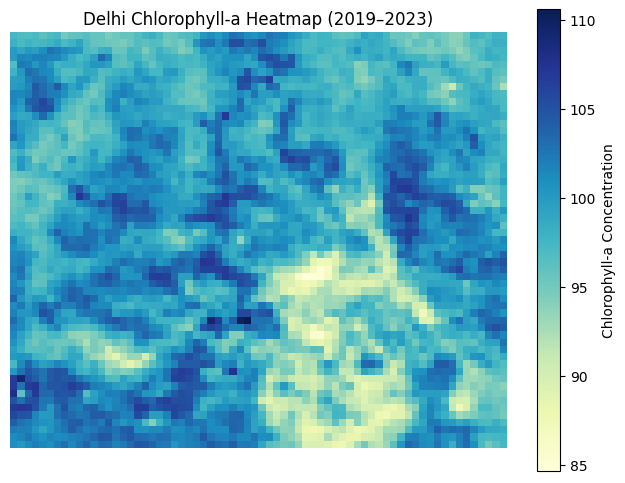

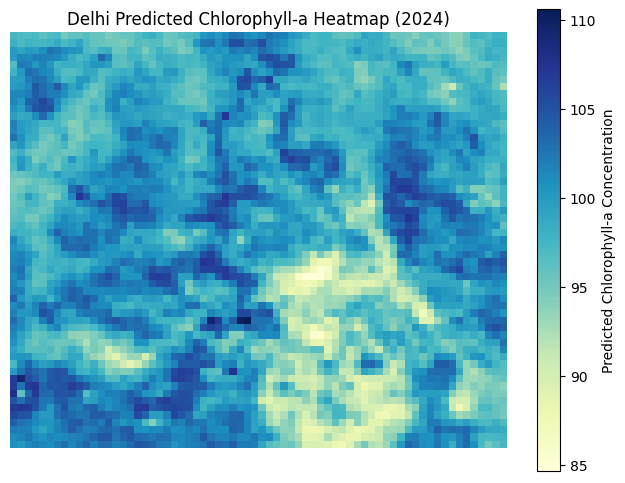

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2024.tif


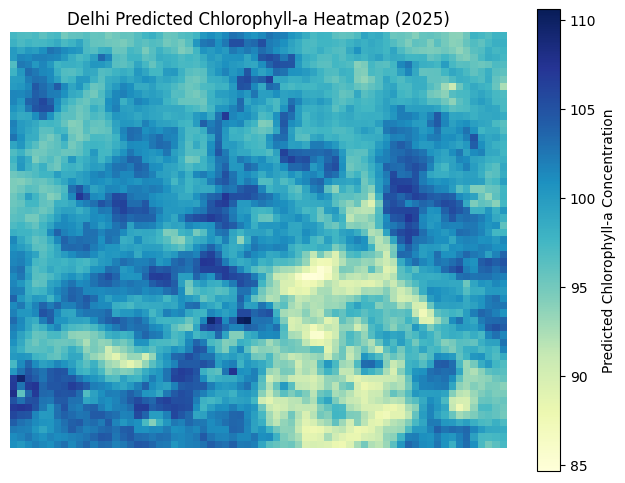

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2025.tif


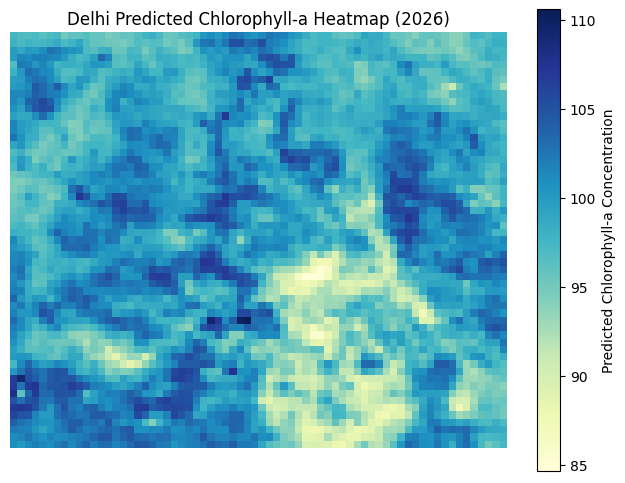

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2026.tif


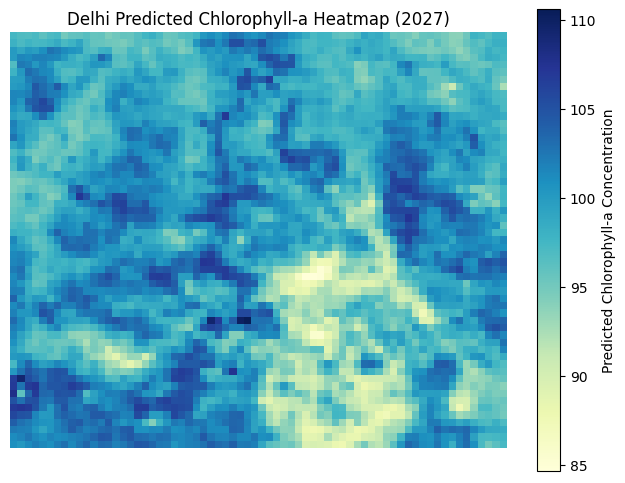

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2027.tif


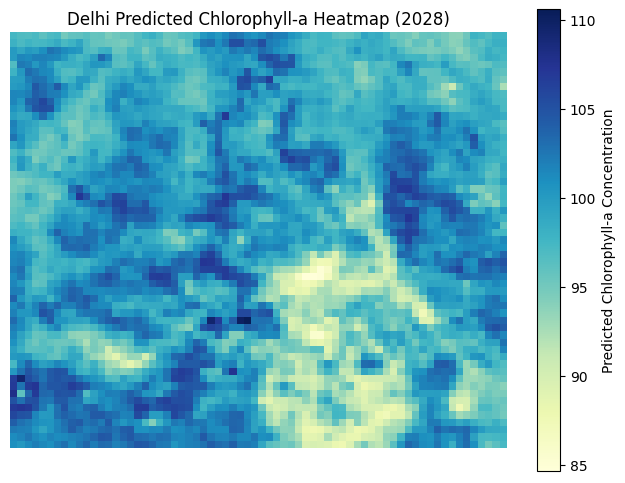

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2028.tif


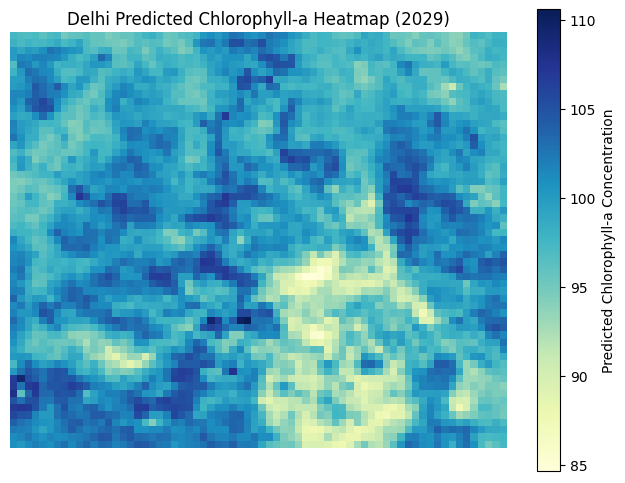

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2029.tif


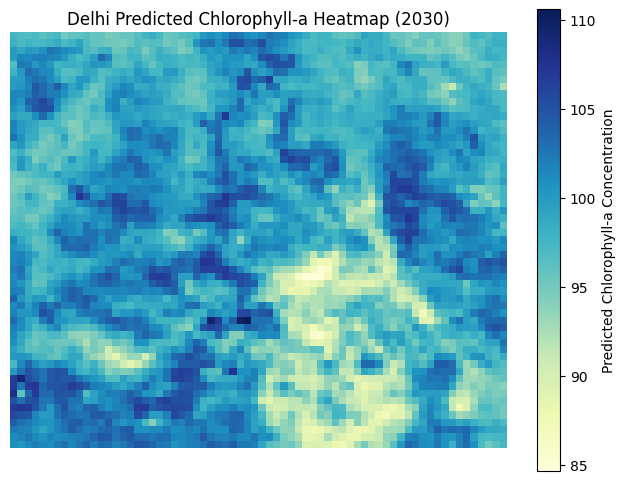

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2030.tif


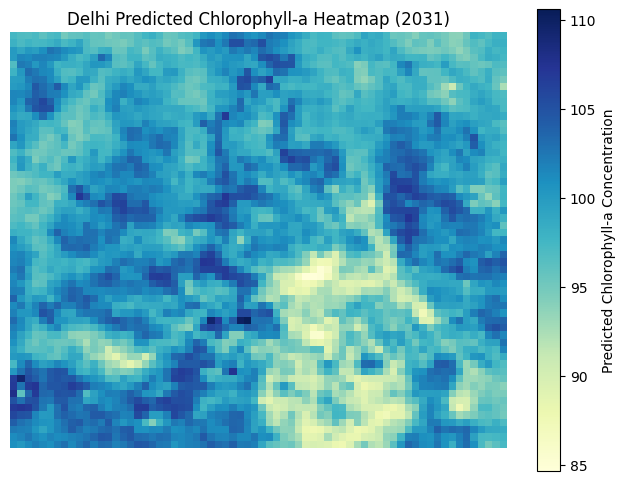

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2031.tif


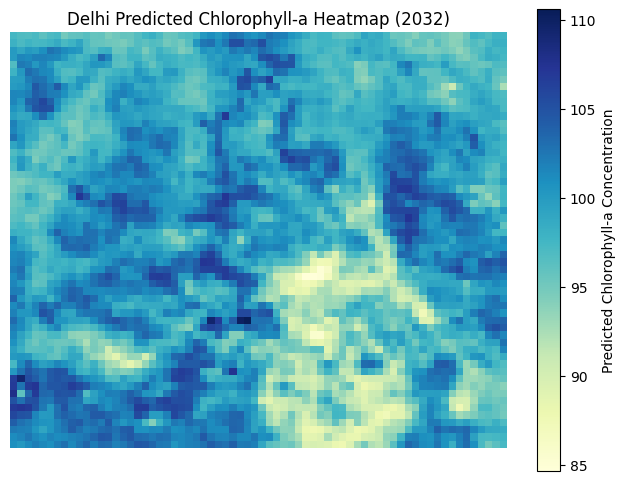

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2032.tif


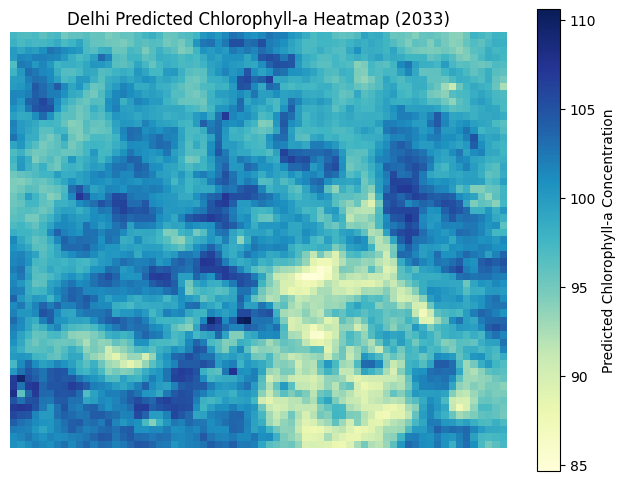

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2033.tif


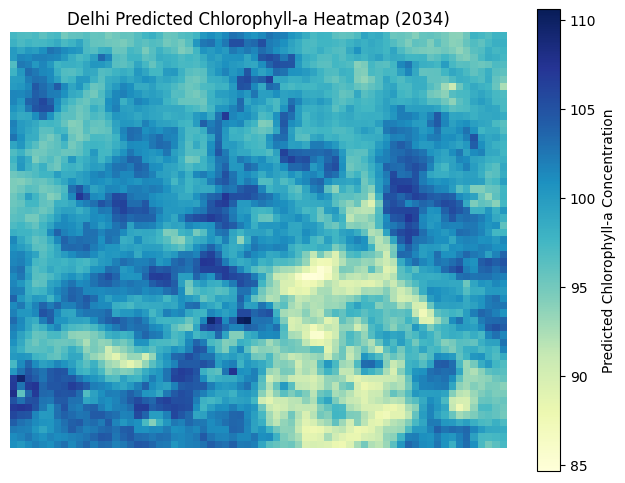

✅ Saved: C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2034.tif


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import differential_evolution

# 📂 Load TIFF file
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_2019_2023.tif"
with rasterio.open(tif_path) as src:
    chl_img = src.read(1)  # Read first band
    profile = src.profile

# 🧹 Clean data (replace NaNs with mean)
chl_img = np.nan_to_num(chl_img, nan=np.nanmean(chl_img))

# 🗺 Plot observed heatmap
plt.figure(figsize=(8, 6))
plt.imshow(chl_img, cmap='YlGnBu')
plt.colorbar(label='Chlorophyll-a Concentration')
plt.title('Delhi Chlorophyll-a Heatmap (2019–2023)')
plt.axis('off')
plt.show()

# 📅 Years (mock)
years = np.arange(2019, 2024)
mean_values = [np.nanmean(chl_img)] * len(years)  # Use same mean as approximation

# 🔥 AIS optimization for Random Forest
def objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(years.reshape(-1, 1), mean_values)
    preds = rf.predict(years.reshape(-1, 1))
    return np.mean((mean_values - preds)**2)

bounds = [(50, 300), (2, 10)]
result = differential_evolution(objective, bounds, strategy='best1bin', maxiter=10, popsize=15, seed=42)
best_n_estimators = int(result.x[0])
best_max_depth = int(result.x[1])

# 🌳 Train Random Forest with optimized parameters
rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_model.fit(years.reshape(-1, 1), mean_values)

# 📈 Predict future years
future_years = np.arange(2024, 2035)
future_preds = rf_model.predict(future_years.reshape(-1, 1))

# 🔥 Create heatmaps for predicted years (2024–2034)
for i, year in enumerate(future_years):
    predicted_img = chl_img * (future_preds[i] / np.nanmean(chl_img))  # Scale
    plt.figure(figsize=(8, 6))
    plt.imshow(predicted_img, cmap='YlGnBu')
    plt.colorbar(label='Predicted Chlorophyll-a Concentration')
    plt.title(f'Delhi Predicted Chlorophyll-a Heatmap ({year})')
    plt.axis('off')
    plt.show()

    # 💾 Save predicted heatmap as TIFF
    out_path = fr"C:\Users\sagni\Downloads\Pollution controller\Delhi_Chlorophyll_a_{year}.tif"
    with rasterio.open(out_path, 'w', **profile) as dst:
        dst.write(predicted_img, 1)
    print(f"✅ Saved: {out_path}")
